In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

In [5]:
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229



Percentage of Restaurants Offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


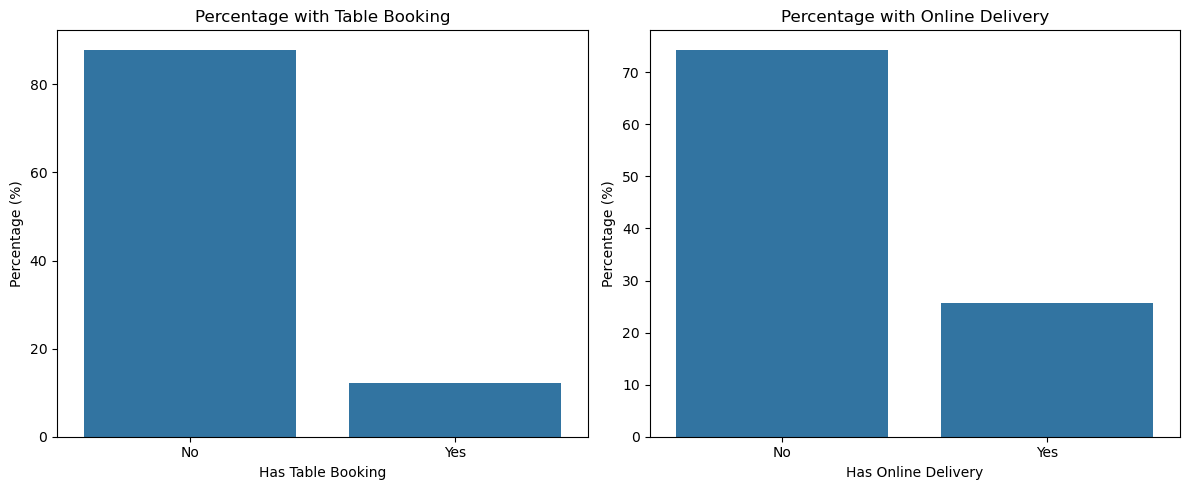

In [7]:
# Step 1: Percentage of Table Booking and Online Delivery
table_booking_count = df['Has Table booking'].value_counts(normalize=True) * 100
print("\nPercentage of Restaurants Offering Table Booking:")
print(table_booking_count)

online_delivery_count = df['Has Online delivery'].value_counts(normalize=True) * 100
print("\nPercentage of Restaurants Offering Online Delivery:")
print(online_delivery_count)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=table_booking_count.index, y=table_booking_count.values, ax=axes[0])
axes[0].set_title('Percentage with Table Booking')
axes[0].set_xlabel('Has Table Booking')
axes[0].set_ylabel('Percentage (%)')
sns.barplot(x=online_delivery_count.index, y=online_delivery_count.values, ax=axes[1])
axes[1].set_title('Percentage with Online Delivery')
axes[1].set_xlabel('Has Online Delivery')
axes[1].set_ylabel('Percentage (%)')
plt.tight_layout()
plt.show()


Average Ratings by Table Booking Status:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


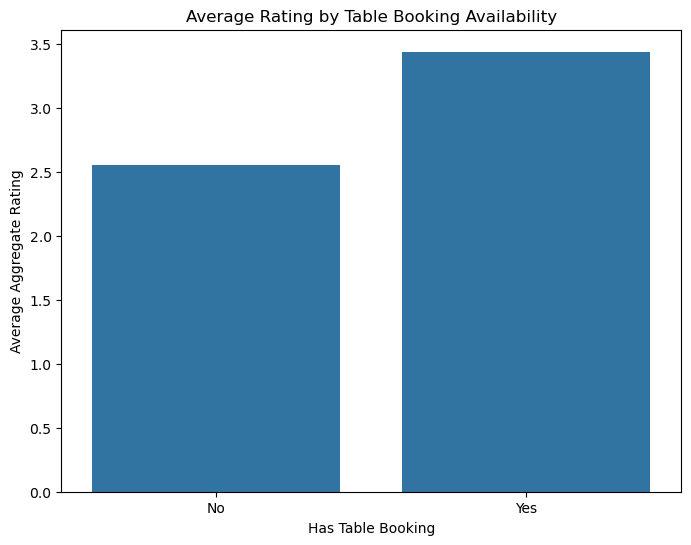


T-test for Rating Difference (Table Booking): t-stat = 18.91, p-value = 0.0000
Significant difference in ratings between groups.


In [9]:
# Step 2: Compare Average Ratings by Table Booking
rating_by_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage Ratings by Table Booking Status:")
print(rating_by_table_booking)

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_by_table_booking.index, y=rating_by_table_booking.values)
plt.title('Average Rating by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.show()

rating_yes = df[df['Has Table booking'] == 'Yes']['Aggregate rating']
rating_no = df[df['Has Table booking'] == 'No']['Aggregate rating']
t_stat, p_value = ttest_ind(rating_yes.dropna(), rating_no.dropna())
print(f"\nT-test for Rating Difference (Table Booking): t-stat = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in ratings between groups.")
else:
    print("No significant difference in ratings between groups.")


Percentage of Online Delivery Availability by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


<Figure size 1000x600 with 0 Axes>

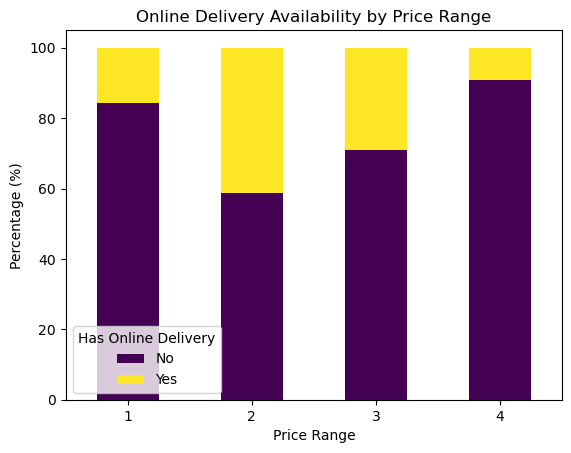

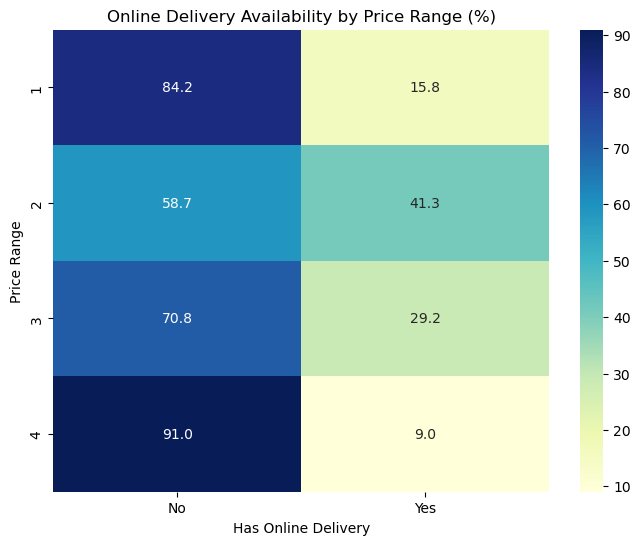

In [11]:
# Step 3: Online Delivery by Price Range
delivery_by_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
print("\nPercentage of Online Delivery Availability by Price Range:")
print(delivery_by_price)

plt.figure(figsize=(10, 6))
delivery_by_price.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.legend(title='Has Online Delivery')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(delivery_by_price, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Online Delivery Availability by Price Range (%)')
plt.xlabel('Has Online Delivery')
plt.ylabel('Price Range')
plt.show()